In [1]:
import requests
import time
import pandas as pd

In [9]:
url = 'https://api.hh.ru/specializations'

In [10]:
res = requests.get(url)
specializations = res.json()

In [12]:
# создаём список id специализаций для обхода ограничения HH в выдаче 2000 items в списке
specialization_ids = []
for i in specializations:
    for j in i['specializations']:
        specialization_ids.append(j['id'])

In [14]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1

In [29]:
# получаем id вакансий для каждой из специализаций
all_vacancy_ids = []
for i in specialization_ids:
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}&specialization={i}'
    res = requests.get(url)
    vacancies = res.json()
    for j in range(vacancies.get('pages')):
        url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={j}&per_page={num_per_page}&area={moscow}&specialization={i}'
        res = requests.get(url)
        vacancies = res.json()
        vacancy_ids = [el.get('id') for el in vacancies.get('items')]
        all_vacancy_ids.extend(vacancy_ids)

In [39]:
# избавляемся от дублей (вакансии в нескольких специализациях)
all_vacancy_ids = set(all_vacancy_ids)
del test
len(all_vacancy_ids)

1978

In [12]:
# список с ключами, которые запрашивать из данных HH по вакансии
keys = ["id", "name", "salary", "experience", "schedule", "employment", "description", "key_skills", "published_at", "created_at", "alternate_url"]

In [ ]:
# записываем в файл заголовок данных
with open('data.csv', mode='a', encoding='utf-8') as f:
    string = ''
    for i in keys:
        string += i + '~'
    string = string[:-1]

In [28]:
# запись данных в файл
with open('data.csv', mode='a', encoding='utf-8') as f:
    for vac_id in all_vacancy_ids:
        url = f'https://api.hh.ru/vacancies/{vac_id}'
        res = requests.get(url)
        vacancy = res.json()
        string = ''
        for key in keys:
        # обработка данных зависит от типа данных            
            if isinstance(vacancy[key], dict):
                if key == 'salary':
                    val = str(vacancy[key]['from']) + '~'
                else:
                    val = str(vacancy[key]['name']) + '~'                
            elif vacancy[key] and isinstance(vacancy[key], list):
                val = ''
                for i in vacancy[key]:
                    if isinstance(i, dict):
                        val = str(i['name']) + ','
                    else:
                        val = str(i) + ','
                val += '~'
            elif vacancy[key]:
                val = str(vacancy[key]) + '~'
            else:
                val = 'empty' + '~'
            string += val
        string = string[:-1] + '\n'
        f.write(string)
        time.sleep(0.05)

In [ ]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти) +
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии +
# Создайте аналогичный vacancy DataFrame только добавьте поле skills +
# Переведите даты публикаций в datetime +
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

# Создайте аналогичный vacancy DataFrame только добавьте поле skills

In [27]:
vacancy = pd.read_csv('data.csv', sep="~")

# Переведите даты публикаций в datetime

In [28]:
vacancy['created_at'] = pd.to_datetime(vacancy['created_at'])

In [29]:
vacancy['published_at'] = pd.to_datetime(vacancy['published_at'])

# Постройте график опубликованных вакансий по датам

<AxesSubplot:xlabel='published_at'>

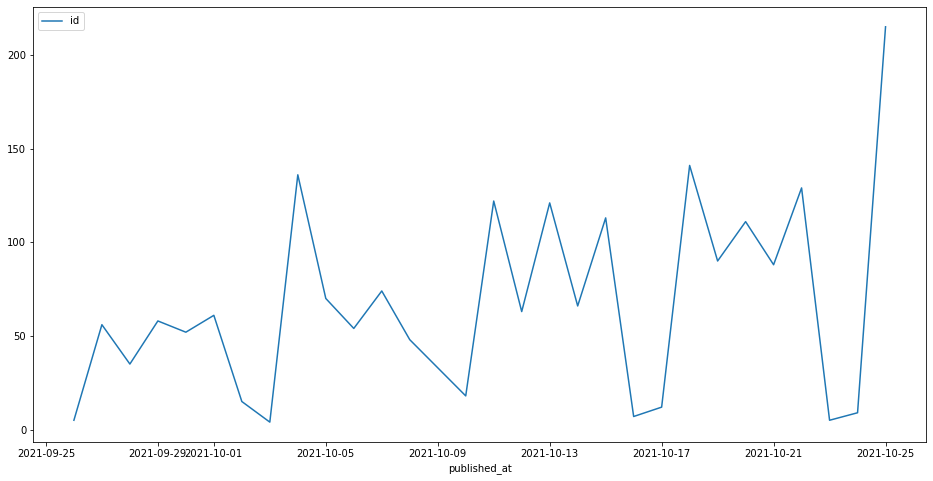

In [48]:
pd.DataFrame({'published_at': pd.to_datetime(vacancy['published_at']).dt.date, 'id': vacancy['id']})\
        .groupby('published_at').agg('count').plot(figsize=(16,8))

# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [99]:
vacancy.published_at.dt.day_name().value_counts()
# ответ - в понедельник больше всего публикаций вакансий

Monday       670
Friday       351
Wednesday    344
Thursday     280
Tuesday      258
Sunday        48
Saturday      27
Name: published_at, dtype: int64

# Найдите те вакансии с использованием python, которые вам интересны

In [109]:
nice_vacs = vacancy[(vacancy['name'].str.contains('data analyst|аналитик данных|data аналитик|аналитик', case=False))&\
         (vacancy['description'].str.contains('python', case=False))]
nice_vacs

,id,name,salary,experience,schedule,employment,description,key_skills,published_at,created_at,alternate_url
43,49040470,Аналитик данных – разработчик Qlik,empty,От 1 года до 3 лет,Полный день,Полная занятость,<p><strong>Обязанности:</strong></p> <ul> <li>...,"Hive,",2021-10-21 14:08:34+03:00,2021-10-21 14:08:34+03:00,https://hh.ru/vacancy/49040470
57,48915767,Аналитик по моделям,empty,От 3 до 6 лет,Полный день,Полная занятость,<p><strong>Позиция Middle DS &amp; Model Manag...,empty,2021-10-18 10:58:04+03:00,2021-10-18 10:58:04+03:00,https://hh.ru/vacancy/48915767
78,46465241,Главный системный аналитик аналитик (Реклама),empty,От 3 до 6 лет,Полный день,Полная занятость,"<p>Мы - новая быстрорастущая команда, создающа...","Atlassian Jira,",2021-10-22 14:45:07+03:00,2021-10-22 14:45:07+03:00,https://hh.ru/vacancy/46465241
148,49009043,Аналитик данных – разработчик Qlik,empty,От 1 года до 3 лет,Полный день,Полная занятость,<p>В <strong>команду</strong> Аналитических се...,"Визуализация данных,",2021-10-20 15:34:10+03:00,2021-10-20 15:34:10+03:00,https://hh.ru/vacancy/49009043
168,48501671,Data-аналитик в команду голосовых и текстовых ...,empty,От 1 года до 3 лет,Полный день,Полная занятость,<p>Мы ищем <strong>Data-аналитика </strong>в к...,empty,2021-10-04 18:00:14+03:00,2021-10-04 18:00:14+03:00,https://hh.ru/vacancy/48501671
189,48749739,Бизнес-аналитик / Product Owner,empty,От 1 года до 3 лет,Полный день,Полная занятость,<p> </p> <p><strong>Обязанности:</strong></p> ...,empty,2021-10-12 11:43:12+03:00,2021-10-12 11:43:12+03:00,https://hh.ru/vacancy/48749739
197,48911940,Аналитик данных (Ядро Аватара),empty,От 1 года до 3 лет,Полный день,Полная занятость,<p>В настоящее время Сбербанк активно развивае...,"Разработка технических заданий,",2021-10-18 10:02:09+03:00,2021-10-18 10:02:09+03:00,https://hh.ru/vacancy/48911940
263,48538991,"Аналитик данных (SQL, Python) в команду развит...",empty,Нет опыта,Полный день,Полная занятость,<p><strong>Требования:</strong></p><p>Мы ищем ...,empty,2021-10-05 15:42:33+03:00,2021-10-05 15:42:33+03:00,https://hh.ru/vacancy/48538991
288,48328358,Data Аналитик,empty,Нет опыта,Полный день,Полная занятость,<p>Ищем Аналитика в проект по Разметке данных ...,empty,2021-10-22 13:27:57+03:00,2021-10-22 13:27:57+03:00,https://hh.ru/vacancy/48328358
344,48470312,Аналитик (информационная безопасность),empty,От 1 года до 3 лет,Полный день,Полная занятость,<p><strong>Обязанности:</strong></p> <ul> <li>...,empty,2021-10-04 09:21:46+03:00,2021-10-04 09:21:46+03:00,https://hh.ru/vacancy/48470312


# Определите по полю skills какие навыки больше всего востребованы для этих вакансий

In [101]:
nice_vacs[nice_vacs['key_skills'] != 'empty']['key_skills'].value_counts()
# в выборке мало оказалось вакансий с заполненным 'key_skills'. Поскольку выборка небольшая видно без допинструментов:
# работа с базой данных (в разных формулировках) - 4 упоминания, остальные не более 2-х повторений

Аналитическое мышление,            2
Atlassian Jira,                    2
Teradata,                          2
Linux,                             2
MS Paint,                          1
SQL,                               1
Big Data,                          1
Базы данных,                       1
Лендинг,                           1
MS Visio,                          1
Аналитические исследования,        1
Теория вероятностей,               1
Работа с базами данных,            1
методология,                       1
Power BI,                          1
Визуализация данных,               1
Java,                              1
Data Analysis,                     1
Google Analytics,                  1
Анализ данных,                     1
Spark,                             1
PostgreSQL,                        1
Qlik Sense,                        1
Ad Hoc Analysis,                   1
MS PowerPoint,                     1
Грамотность,                       1
Hive,                              1
О

# Постройте график наиболее востребованных вакансий

<AxesSubplot:>

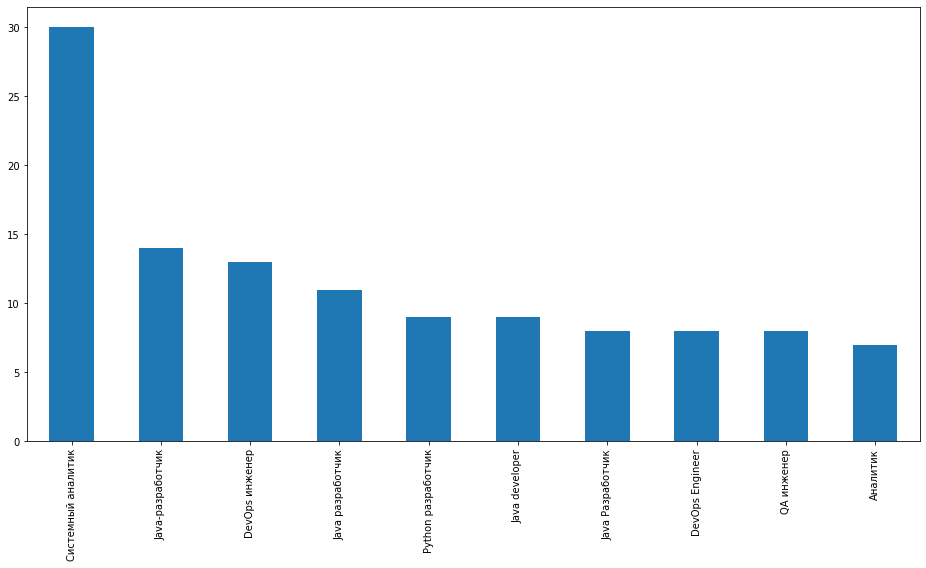

In [110]:
vacancy.name.value_counts().head(10).plot(kind='bar', figsize=(16,8))
# Что же это выходит? Надо было в Java подававться? =)
# Java разработчик встречается в четырёх вариантах написания и в сумме больше 40 вакансий!!!